<h1 align="center"> Лабораторная работа №3</h1>
<h1 align="center"> Методы оптимизации </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

<h2 align="center"> Функция Химмельблау </h2>

---

### Выполнили:
- **Бархоткина Анастасия 408226**
- **Лаврик Вадим 408969**
- **Юрков Кирилл 409936**

---

### Преподаватель:
- **Хитров Егор Германович**

---

### 2025 г.

---

#### **Цель работы:**
Изучить и провести сравнительный анализ различных методов оптимизации для нахождения приближения к точке минимума нелинейной функции. Оценить эффективности методов с точки зрения числа итераций, вычислительной сложности и качества получаемого решения.

#### **Задачи:**
1. Реализовать метод градиентного спуска для нахождения приближения к точке минимума функции.
2. Применить метод Ньютона для нахождения приближения к точке минимума.
3. Реализовать модифицированный метод Ньютона, в котором матрица Гессе вычисляется однократно в начальной точке. Проанализировать сходимость метода.
4. Применить метод Бройдена с выбором шага спуска при помощи метода золотого сечения.
5. Реализовать метод Бройдена с выбором шага спуска на основе условий Армихо.
6. Визуализировать процесс оптимизации для каждого метода: построить графики убывания функции по итерациям.
7. Оценить и сравнить вычислительную сложность рассмотренных методов, выбрать наиболее эффективный алгоритм.

В данной работе, как и в первой, будем исслодвать методы на примере функции Химмельблау, которая определена как: 
$$ 
f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 
$$. 
Данная функция принадлежит классу гладких функций $ C^{\infty} $ и является многомодальной, то есть имеет несколько локальных минимумов, а именно: 
$$(3.0;2.0) \quad (-2.805;3.131) \quad (-3.779;-3.283) \quad (3.584;-1.848).$$


Градиент функции определяется как вектор, составленный из частных производных по переменным x и y. Для нашей функции:
    $$\frac{\partial f}{\partial x} = 4x(x^2 + y - 11) + 2(x + y^2 - 7)$$
    $$\frac{\partial f}{\partial y} = 2(x^2 + y - 11) + 4y(x + y^2 - 7)$$


Импортируйте че вам там надо

In [194]:
import numpy as np
import matplotlib.pyplot as plt

def himmelblau(p):
    x, y = p
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

def grad_himmelblau(p):
    x, y = p
    df_dx = 4 * x * (x ** 2 + y - 11) + 2 * (x + y ** 2 - 7)
    df_dy = 2 * (x ** 2 + y - 11) + 4 * y * (x + y ** 2 - 7)
    return np.array([df_dx, df_dy])

x0=[0,0]

Отобразим график функции Химмельблау

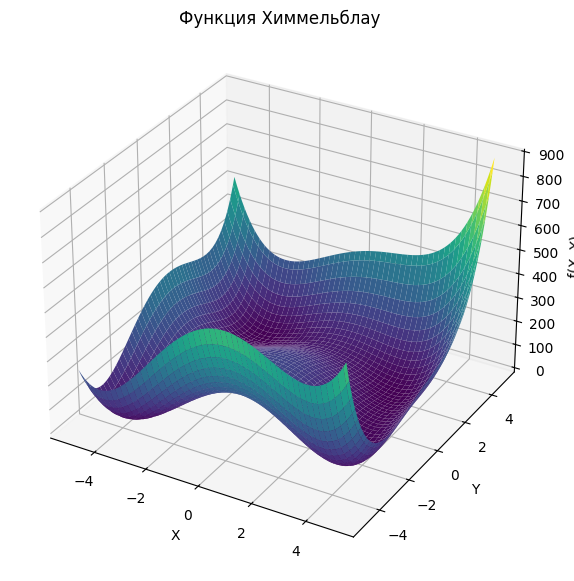

In [195]:
def himmelblau_visualization():
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = himmelblau([X, Y])
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X, Y)')
    ax.set_title('Функция Химмельблау')
    plt.show()

himmelblau_visualization()

#### **Ход работы:**
### Задание 1. Метод градиентного спуска.

Этот итерационный метод минимизации функции был нами подробно рассмотрен в ЛР №1, поэтому детально на нем останавливаться не будем. Следует отметить, что он основан на движении в направлении антиградиента функции.


Идея метода заключается в том, что на каждой итерации обновляется текущая точка $x_k$ по формуле:

$$
x_{k+1} = x_k - \alpha_k \nabla f(x_k),
$$

где
- $\nabla f(x_k)$ — градиент функции в точке $x_k$,
- $\alpha_k > 0$ — шаг (скорость обучения), фиксированный или динамический.

Примем шаг спуска равным $ h = 0.0005 $. Это середина заданного в первой работе интервала $0 < h < 0.001 $. 

In [196]:
h_fix = 0.0005
def gradient_descent(start, h):
    point = np.array(start, dtype=float)
    path = [point.copy()]  
    for count_iterations in range(10000):
        grad = grad_himmelblau([point[0], point[1]])
        if np.linalg.norm(grad) < 0.0001:
            break
        point -= h * grad
        path.append(point.copy())  
    return point, np.array(path), count_iterations

In [197]:
x_min_grad, path_grad, count_iterations_grad = gradient_descent(x0, h_fix)
print(f"Найденный минимум: {np.round(x_min_grad, 4)}")
print(f"Количество итераций: {count_iterations_grad}")

Найденный минимум: [3. 2.]
Количество итераций: 993


#### **Критерий остановки**
Итерации продолжаются до тех пор, пока $ \|\nabla f(x_k)\|_2 $ не станет меньше заданной точности. В нашем случае:
$$
 \|\nabla f(x_k)\|_2 \leq 0.0001
$$


#### **Вычислительная сложность**


### Задание 2. Метод Ньютона.
Это итерационный метод минимизации функции, который использует информацию о первой и второй производных функции (градиент и матрицу Гессе). Он находит приближение к точке минимума функции, используя квадратичную аппроксимацию целевой функции.

На каждой итерации точка $x_k$ обновляется по формуле:

$$
x_{k+1} = x_k - [\nabla^2 f(x_k)]^{-1} \nabla f(x_k),
$$

где:
- $\nabla f(x_k)$ — градиент функции в точке $x_k$,
- $\nabla^2 f(x_k)$ — матрица Гессе,
- $[\nabla^2 f(x_k)]^{-1}$ — обратная матрица Гессе.

Матрица Гессе:

In [198]:
def hess_himmelblau(p):
    x, y = p
    H = np.zeros((2, 2))
    H[0, 0] = 4 * (x ** 2 + y - 11) + 8 * x ** 2 + 2
    H[0, 1] = H[1, 0] = 4 * x + 4 * y
    H[1, 1] = 2 + 4 * (x + y ** 2 - 7) + 8 * y ** 2
    return H

#### **Условия сходимости**
Для успешного применения метода Ньютона необходимо выполнение следующих условий:
1. Гладкость функции:
- Функция должна быть дважды непрерывно дифференцируемой. 
- Матрица Гессе должна существовать и быть невырожденной $\det(\nabla^2 f(x)) \neq 0  $
2. Начальное приближение $x_{0}$ должно быть достаточно близко к точке минимума. 
3. Если функция строго выпуклая ($\nabla^2 f(x) > 0$), то метод Ньютона сходится к глобальному минимуму. 
4. При соблюдении условий метод сходится квадратично:$\|x_{k+1} - x_{min}\| \leq C \|x_k - x_{min}\|^2$

Условие Армихо:

In [199]:
def armijo(f, grad, x, p, alpha=10, beta=0.9, sigma=0.0001, max_iter=100):
    fx = f(x)
    g = grad(x)
    for _ in range(max_iter):
        if f(x + alpha * p) <= fx + sigma * alpha * np.dot(g, p):
            break
        alpha *= beta
    return alpha

### Задание 3. Модифицированный метод Ньютона.


Это упрощённая версия классического метода Ньютона, в которой матрица Гессе вычисляется только один раз в начальной точке, что позволяет снизить вычислительные затраты, так как на каждой итерации не требуется пересчитывать и обращать матрицу Гессе.



Метод использует локальную квадратичную аппроксимацию функции, но матрица Гессе фиксируется на начальной точке $x_0$. Таким образом, направление спуска определяется как:

$$
p_k = -[\nabla^2 f(x_0)]^{-1} \nabla f(x_k)
$$

Это означает, что направление спуска зависит только от градиента в текущей точке $x_{k}$, а кривизна функции учитывается через фиксированную матрицу Гессе $\nabla^2 f(x_0)$.


Обновление функции происходит следующим образом:
$$
x_{k+1} = x_k + p_k
$$

In [200]:
def modified_newton_method(f, grad, hess, x0, max_iter=1000):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    
    H_fixed = hess(x)
    
    epsilon = 1e-6
    H_fixed_reg = H_fixed + epsilon * np.eye(H_fixed.shape[0])
    
    try:
        H_inv_fixed = np.linalg.inv(H_fixed_reg)
    except np.linalg.LinAlgError:
        print("Матрица Гессе вырождена даже после регуляризации")
        return x, path

    for k in range(max_iter):
        g = grad(x)
        p = -H_inv_fixed @ g  
        alpha = armijo(f, grad, x, p)

        x_new = x + alpha * p
        path.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < 0.0001:
            break

        x = x_new

    else:
        print("Достигнуто максимальное число итераций")

    return x, path, k

In [201]:
x_min_modified_newton, path_modified_newton, count_iterations_modified_newton = modified_newton_method(himmelblau, grad_himmelblau, hess_himmelblau, x0)

Достигнуто максимальное число итераций


#### **Критерий остановки**
Аналогично предыдущим методам??

#### **Сходимость**
Глобально условия сходимости такие же как и в классическом методе Ньюттона, однако скорость сходимости может быть ниже, особенно если матрица Гессе существенно меняется вдоль траектории.

In [202]:
print(f"Найденный минимум: {np.round(x_min_modified_newton, 4)}")
print(f"Количество итераций: {count_iterations_modified_newton}")

Найденный минимум: [-0.848  -4.5328]
Количество итераций: 999


#### Что-то умное для сравнения
Модифицированный метод Ньютона является компромиссом между классическим методом Ньютона и градиентным спуском. Он снижает вычислительные затраты за счёт однократного обращения матрицы Гессе, но его сходимость может быть менее эффективной для задач с сильно меняющейся кривизной.

### Задание 3. Метод Бройдена. 
Это квазиньютоновский метод минимизации функции, который аппроксимирует матрицу Гессе или её обратную. В отличие от метода Ньютона, здесь не требуется явно вычислять вторые производные, что значительно снижает вычислительные затраты. 


На каждой итерации точка $x_k$ обновляется по формуле:

$$
x_{k+1} = x_k - B_k^{-1} \nabla f(x_k)
$$

где:
- $\nabla f(x_k)$ — градиент в точке $x_k$,
- $B_k$ — аппроксимация матрицы Гессе (или ее обратной)

Матрица $B_k$ обновляется по формуле:

$$
B_{k+1} = B_k + \frac{(y_k - B_k s_k) s_k^\top}{s_k^\top s_k}
$$

где:
- $y_k = \nabla f(x_{k+1}) - \nabla f(x_k)$ — изменение градиента,
- $s_k = x_{k+1} - x_k$ — изменение аргумента.

Алгоритм выполняет итерации до достижения предельного числа шагов. 

In [203]:
def broyden_method(f, grad_f, x0, func_iter, max_iter=5000, tol=0.0001, gamma_min=1e-12, gamma_max=1):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    d = len(x)
    B = np.eye(d) 
    g = grad_f(x)
    p = -B @ g 

    iterations = 0 

    for _ in range(max_iter):
        gamma = func_iter(f, x, p)
        gamma = max(gamma_min, min(gamma, gamma_max))

        x_new = x + gamma * p
        g_new = grad_f(x_new)

        if np.linalg.norm(g_new) < tol:
            break

        s = x_new - x
        y = g_new - g
        Bs = B @ s

        numerator = np.outer(y - Bs, s)
        denominator = np.dot(s, s)
        if denominator != 0:
            B += numerator / denominator

        B += np.eye(d) * 1e-6

        x = x_new
        g = g_new
        p = -B @ g

        path.append(x.copy())

        iterations += 1 

    return x, path, iterations

#### **Выбор шага спуска.**
#### 3.1. Метод золотого сечения.
Задается интервал $[a, b]$. Далее вычислияются точки деления:


$$
\begin{aligned}
x_1 &= b - \phi(b-a), \\
x_2 &= a + \phi(b-a),
\end{aligned}
$$

которые делят интервал на две части в пропорции золотого сечения ($\phi = \frac{\sqrt{5}-1}{2} \approx 0.618$). Далее будем вычислять значения функции в этих двух точках внутри интервала. 

Затем будем сужать интервал, сохраняя пропорцию золотого сечения, пока не достигнем заданной точности. Сужение происходит по следующему принципу:

- если $f(x_1) < f(x_2)$, то новый интервал $[a, x_2]$
- если $f(x_1) \geq f(x_2)$, то новый интервал $[x_1, b]$


Оптимальный шаг находим следующим образом:
$$
\alpha_k = \mathop{\mathrm{arg\,min}}\limits_{\alpha > 0} f(x_k + \alpha p_k)
$$


Шаг спуска выбирается численно, что обеспечивает более точное движение вдоль направления спуска.

In [204]:
def opt_step(f, x, p, x1=0, x2=0.5, eps=1e-8):
    phi = (1 + np.sqrt(5)) / 2
    a, b = x1, x2

    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi

    f1 = f(x + x1 * p)
    f2 = f(x + x2 * p)

    while abs(b - a) > eps:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - (b - a) / phi
            f1 = f(x + x1 * p)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (b - a) / phi
            f2 = f(x + x2 * p)

    alpha = (a + b) / 2
    return alpha

In [205]:
x_min_broyden_opt, path_broyden_opt, count_iterations_broyden_opt = broyden_method(himmelblau, grad_himmelblau, x0, opt_step)
print(f"Найденный минимум: {np.round(x_min_broyden_opt, 4)}")
print(f"Количество итераций: {count_iterations_broyden_opt}")

Найденный минимум: [3. 2.]
Количество итераций: 6


#### 3.2. Условия Армихо.
Эти условия используются для выбора шага, который обеспечивает достаточное уменьшение функции и предотвращает слишком маленькие шаги.
- Первое условие (достаточное уменьшение).

Шаг $\alpha_k$ должен удовлетворять неравенству:

$$
f(x_k + \alpha_k p_k) \leq f(x_k) + c_1 \alpha_k \nabla f(x_k)^\top p_k,
$$

где $0 < c_1 < 1$ — параметр, определяющий допустимое уменьшение функции (обычно $c_1 \approx 10^{-4}$).
- Второе условие (правило кривизны).
$$
\nabla f(x_k + \alpha_k p_k)^\top p_k \geq c_2 \nabla f(x_k)^\top p_k,
$$

где $c_1 < c_2 < 1$ — параметр кривизны (обычно $c_2 \approx 0.9$). Это правило помогает избежать слишком маленьких шагов, которые могут замедлить сходимость.


Параметры неточного поиска подберем самостоятельно, экспериментальным путем. Начнем со значения $\alpha_k = 1$. Затем будем проверять указанные условия Армихо. Если они не выполняются то будем уменьшать шаг следующим образом:
$$
\alpha_k = \tau \alpha_k, \quad \text{где } \tau \in (0,1) \text{ — коэффициент уменьшения}.
$$


Условия Армихо гарантируют, что значение функции на каждой итерации уменьшается, что делает метод более устойчивым.





In [206]:
def armijo(f, x, p, alpha=10, beta=0.9, sigma=0.0001, max_iter=100):
    fx = f(x)
    g = grad_himmelblau(x)
    for _ in range(max_iter):
        if (f(x + alpha * p) <= fx + sigma * alpha * np.dot(g, p)).any():
            break
        alpha *= beta
    return alpha

In [207]:
x_min_broyden_armijo, path_broyden_armijo, count_iterations_broyden_armijo = broyden_method(himmelblau, grad_himmelblau, x0, armijo)
print(f"Найденный минимум: {np.round(x_min_broyden_armijo, 4)}")
print(f"Количество итераций: {count_iterations_broyden_armijo}")

Найденный минимум: [3. 2.]
Количество итераций: 4070


### Сравнение методов
итерации, вычислительная нагрузка и почему так